# Kecerdasan Buatan

## Tugas 1: Model Linear

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi tugas1_NIM.ipynb.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

_Packages_ yang Anda akan gunakan dalam mengerjakan tugas ini antara lain:

- keras
- matplotlib
- numpy
- pandas
- pillow
- scipy
- seaborn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda. Untuk kode yang Anda ambil dari sumber lain, **cantumkan URL menuju referensi tersebut jika diambil dari internet**!

Perhatikan poin untuk tiap soal! **Semakin kecil poinnya, berarti kode yang diperlukan untuk menjawab soal tersebut seharusnya semakin sedikit!**

**Nilai akhir: XX/40**

### Deskripsi Dataset

Pada tugas kali ini, Anda akan mencoba menggunakan metode *machine learning* untuk melakukan dua jenis prediksi: **regresi** dan **klasifikasi**.

**Untuk kasus regresi**, Anda diminta untuk memprediksi jumlah penjualan berdasarkan uang yang dihabiskan pada media iklan yang digunakan. Terdapat tiga media iklan, yaitu TV, Radio dan Newspaper. Dengan detail atribut sebagai berikut:

- TV: biaya yang dihabiskan untuk iklan tayangan TV untuk setiap satu produk dalam sebuah pasar (dalam ribuan dollar)
- Radio: biaya yang dihabiskan untuk iklan di radio (dalam ribuan dollar)
- Newspaper: biaya yang dihabiskan untuk iklan di koran (dalam ribuan dollar)
- Sales: penjualan dari setiap satuan produk pada suatu pasar (dalam ribuan widget)

**Untuk kasus klasifikasi**, Anda akan menggunakan dataset Food-101 yang memiliki 101 kategori makanan dengan total 101.000 gambar makanan. Dataset untuk tugas ini diambil dari Food-101 (https://www.vision.ee.ethz.ch/datasets_extra/food-101/). Untuk versi yang lebih sederhana, Anda hanya akan membandingkan apakah gambar yang diberikan berupa *sushi* atau *pizza*. Anda akan melakukan klasifikasi menggunakan algoritma regresi logistik dan neural networks dalam tugas ini.

### Mengimpor Modul dan Dataset

In [1]:
from __future__ import print_function, division # Gunakan print(...) dan bukan print ...
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import requests

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

RANDOM_STATE = 1337
np.random.seed(RANDOM_STATE)

## 1. Eksplorasi Awal Data - Advertising (6 poin)

In [2]:
df = pd.read_csv('https://github.com/aliakbars/uai-ai/raw/master/datasets/advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Soal 1.1.a (1 poin)

Laporkan deskripsi dari Advertising dataset dengan menggunakan metode dari Pandas!

In [3]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Soal 1.1.b (2 poin)

Berapa nilai `sales` paling rendah dan nilai `sales` paling tinggi dari data yang Anda miliki? Berapa ribu dollar uang yang dihabiskan untuk membayar biaya iklan di `TV`, `radio`, dan `newspaper` untuk produk tersebut?


In [4]:
print('Sales Minimum: ', df['sales'].min())
print('Sales Maximum: ', df['sales'].max())

Sales Minimum:  1.6
Sales Maximum:  27.0


In [5]:
print('Cost Ads on TV: ',  df['TV'].sum())
print('Cost Ads on Radio: ',  df['radio'].sum())
print('Cost Ads on Newspaper: ',  df['newspaper'].sum())

Cost Ads on TV:  29408.5
Cost Ads on Radio:  4652.800000000001
Cost Ads on Newspaper:  6110.799999999999


### Soal 1.2 (3 poin)

Gambarkan scatter plot dari `sales` terhadap media iklan `TV`, `radio`, dan `newspaper`.

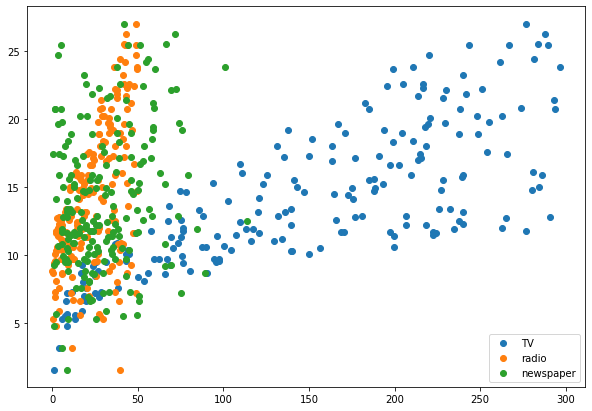

In [6]:
plt.figure(figsize=(10, 7))
plt.scatter(df['TV'], df['sales'], label='TV')
plt.scatter(df['radio'], df['sales'], label='radio')
plt.scatter(df['newspaper'], df['sales'], label='newspaper')
plt.legend()
plt.show()

## 2. Prediksi Penjualan Berdasarkan Biaya Media Iklan dengan Regresi Linear (19 poin)

### Soal 2.1 (4 poin)

Kita akan membuat simple linear regression dengan satu fitur. Dalam kasus ini, mari mencoba melihat hubungan antara `sales` dengan biaya untuk media iklan di `TV`.

Ambil fitur dari kolom `TV` dan response dari kolom `sales`, kemudian buat sebuah model linear regression menggunakan pustaka scikit-learn dan latih model tersebut dengan data yang Anda miliki! Laporkan nilai bias dan koefisiennya. Lalu, jelaskan bagaimana intepretasi Anda terhadap koefisien dari model yang Anda miliki.

*Petunjuk: Lihat cara penggunaan pustakanya di [sini](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py).*

In [7]:
X = df['TV'].values
X = X.reshape(-1,1)
y = df['sales'].values

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
pred = lr.predict(X)

Slope: [0.04753664] | Intercept: 7.032593549127695


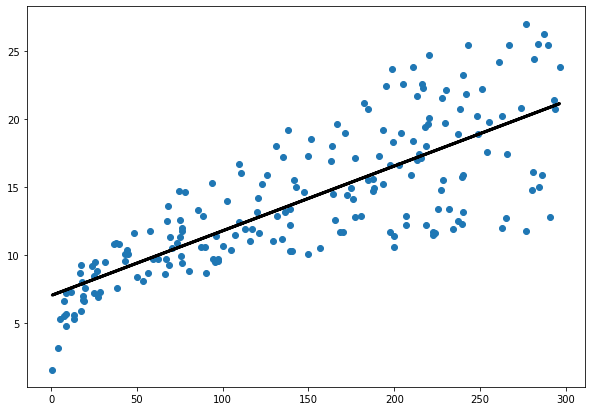

In [9]:
print('Slope: {} | Intercept: {}'.format(lr.coef_, lr.intercept_))

plt.figure(figsize=(10, 7))
plt.scatter(X, y)
plt.plot(X, pred, color='black', linewidth=3)
plt.show()

Jawab:

Pengaruh x iklan di TV terhadap penjualan adalah sebesar 0.0475. Sedangkan penjualan tanpa melakukan iklan di TV adalah 7.03

### Soal 2.2.a (3 poin)

Mari kita lihat seberapa baik garis regresi yang dibuat dari model yang Anda miliki. Buatlah prediksi dari biaya `TV` yang paling minimum dan biaya `TV` yang paling maksimum! Gambarkan scatter plot dan garis regresi model Anda atas prediksi tersebut. Bagaimana garis tersebut mencocokkan data Anda?

In [10]:
pred_min = lr.predict(X.max().reshape(-1,1))
pred_max = lr.predict(X.min().reshape(-1,1))

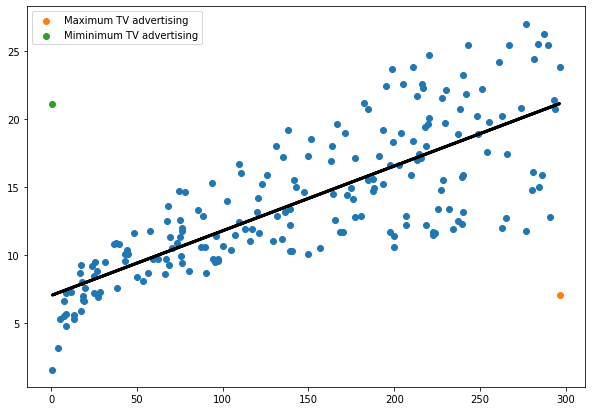

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(X, pred, color='black', linewidth=3)
plt.scatter(X, y)
plt.scatter(X.max(), pred_max, label='Maximum TV advertising')
plt.scatter(X.min(), pred_min, label='Miminimum TV advertising')
plt.legend()

Jawab:

Jika hanya menggunakan linear regression hasil prediksinya jauh dari nilai sebenarnya

### Soal 2.2.b (3 poin)

Coba lakukan kembali regresi pada data tersebut, tetapi kali ini gunakan fungsi basis polinomial orde 3. Gambarkan kembali scatter plot dan fungsi regresinya.

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())

poly_model.fit(X,y)
poly_pred = poly_model.predict(X)
poly_pred_max = poly_model.predict(X.max().reshape(-1,1))
poly_pred_min = poly_model.predict(X.min().reshape(-1,1))

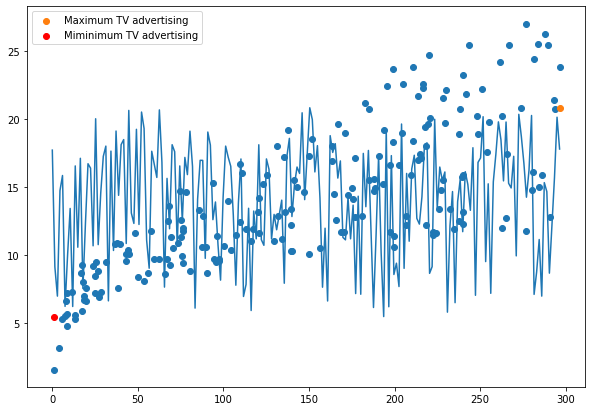

In [13]:
plt.figure(figsize=(10, 7))
plt.plot(np.linspace(0, X.max(), 200), poly_pred)
plt.scatter(X, y)
plt.scatter(X.max(), poly_pred_max, label='Maximum TV advertising')
plt.scatter(X.min(), poly_pred_min, label='Miminimum TV advertising', color='red')
plt.legend()

### Soal 2.2.c (3 poin)

Salah satu cara untuk memastikan bahwa model yang Anda hasilkan sudah cukup baik pada model regresi adalah dengan menghitung nilai *mean squared error* (MSE). Coba hitung nilai MSE untuk regresi dengan dan tanpa fungsi basis polinomial seperti yang Anda kerjakan pada bagian a dan b. Apa yang dapat Anda amati? Apakah nilainya sesuai dengan ekspektasi Anda?

In [14]:
print("MSE linear regression: %.2f" % mean_squared_error(y,pred))
print("MSE linear regression (basis polynomial): %.2f" % mean_squared_error(y,poly_pred))

MSE linear regression: 10.51
MSE linear regression (basis polynomial): 10.24


Jawab:

Kesalahan prediksi dari linear regression yang tidak menggunakan basis polynomial lebih besar dengan yang menggunakan basis polynomial. Hal ini karena fungsin polynomial dapat menyeseuaikan data yang tidak linear.

### Soal 2.3.a (4 poin)

Sekarang kita akan melakukan Multiple Linear Regression. Buatlah sebuah model dengan menggunakan Linear Regression dari scikit-learn untuk fitur `TV`, `radio`, dan `newspaper`. Variabel dependen yang digunakan adalah `sales`. Keluarkan pula nilai bias dan nilai koefisien ketiga fitur tersebut. Sebelum itu, bagi dataset menjadi data latih dan data uji dengan proporsi data uji sebanyak 20%.

In [15]:
X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [17]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
print('Slope: {} | Intercept: {}'.format(lr1.coef_, lr1.intercept_))

Slope: [ 0.04637974  0.18080161 -0.00164953] | Intercept: 3.111531536241248


In [18]:
pred = lr1.predict(X_test)

### Soal 2.3.b (2 poin)

Lakukan evaluasi model *multiple linear regression* yang Anda miliki dari data uji dengan menggunakan *mean squared error*.

In [19]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))

Mean squared error: 3.28


## 3. Eksplorasi Awal Data Food-101 (3 poin)

Pertama, kita akan memuat data menggunakan kode di bawah ini. `X` merupakan gambar yang telah diterjemahkan dalam bentuk *tensor* atau array multidimensi. Dimensi pertama menunjukkan jumlah datanya, dua dimensi berikutnya menunjukkan panjang dan lebar dari gambarnya, dan dimensi keempat merupakan *channels* (RGB). Di sisi lain, `y` adalah kelas dari masing-masing gambar yang diberikan dalam `X` sehingga `X.shape[0] == y.shape[0]`.

In [20]:
def load_file(url):
    filename = url.split('/')[-1]
    with open(filename, 'wb') as f:
        resp = requests.get(url)
        f.write(resp.content)
    return np.load(filename)

In [21]:
X = load_file('https://github.com/aliakbars/uai-ai/raw/master/datasets/food.npy')
y = load_file('https://github.com/aliakbars/uai-ai/raw/master/datasets/food_labels.npy')

X.shape

(2001, 28, 28, 3)

### Soal 3.1 (1 poin)

Berapa banyak gambar sushi dan pizza masing-masing dalam dataset ini?

In [22]:
counts = np.unique(y, return_counts= True)
print('Counts of {} : {}'.format(counts[0][0], counts[1][0]))
print('Counts of {} : {}'.format(counts[0][1], counts[1][1]))

Counts of pizza : 1001
Counts of sushi : 1000


### Soal 3.2 (2 poin)

Gambarkan satu contoh pizza (indeks 0-1000) dan satu contoh sushi (indeks 1001-2000) dari dataset yang digunakan.

*Petunjuk: Anda dapat menggunakan `plt.imshow()`*

Text(0.5, 1.0, 'sushi')

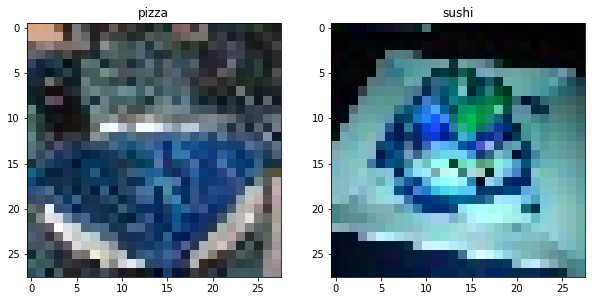

In [23]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].imshow(X[1000])
ax[0].set_title('{}'.format(y[1000]))
ax[1].imshow(X[2000])
ax[1].set_title('{}'.format(y[2000]))

## 4. Klasifikasi Gambar Pizza dan Sushi Menggunakan Logistic Regression (12 poin)

### Soal 4.1 (1 poin)

Bagi dataset Anda menjadi 70-30 untuk training-test sets.

In [24]:
y = [0 if y =='pizza' else 1 for y in y]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Soal 4.2.a (4 poin)

Buat gambar yang berbentuk matriks pixel yang ada menjadi flat, lalu lakukan regresi logistik ke data yang telah Anda bagi tadi.

(array([516862., 395820., 378191., 349023., 356891., 333074., 319087.,
        262563., 208357., 172932.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

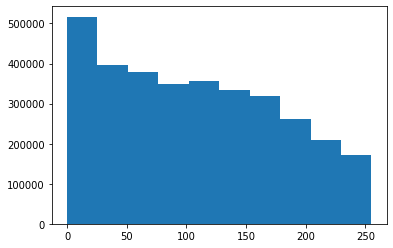

In [26]:
X_train = X_train.flatten()
plt.hist(X_train)

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train.reshape(1400,-1),y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
pred = logreg.predict(X_test.flatten().reshape(-1,2352))

In [29]:
mean_squared_error(y_test, pred)

0.4059900166389351

### Soal 4.2.b (2 poin)

Apa pendapat Anda tentang hasil klasifikasi tersebut? Apakah hasilnya sudah cukup baik?

Hasilnya cukup baik karena nilai MSE dari model tersebut masih dibawah 1. Artinya kesalahan klasifikasinya cukup rendah.

### Soal 4.3 (5 poin)

Apa kesimpulan Anda dari eksperimen sejauh ini? Apa yang dapat dilakukan untuk memperbaiki kinerja model regresi logistik?



*   Parameter Tuning.
*   Karna data yang digunakan sudah dilakukan normalisasi terhadap nilai pixelnya





## 5. Bonus: Klasifikasi Gambar Pizza dan Sushi Menggunakan Deep Learning (5 poin)

Coba klasifikasikan data Food-101 untuk kedua jenis makanan diatas dengan menggunakan pustaka dari Keras untuk *deep learning* atau *neural networks*. Jangan lupa untuk melaporkan akurasi dan *confusion matrix*-nya. Adaptasi kode di atas dan lihat pula contoh kode di [sini](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py). Coba buat Convolutional Neural Network dan jalankan kodenya. Kode *deep learning* Anda hanya dinilai jika berhasil berjalan.

*Petunjuk: Anda mungkin perlu mengubah dimensi dari data latih dan data uji Anda menjadi $n \times d \times d \times 1$ dengan 1 dimensi terakhir adalah channel hitam-putih. Nilainya bisa menjadi 3 jika kita menggunakan channel warna RGB.*

*Anda mungkin perlu menggunakan representasi one-of-K untuk label yang digunakan. Anda dapat menggunakan `keras.utils.to_categorical` untuk melakukan hal ini. Silakan mencontoh kode untuk deep neural networks sederhana di [sini](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py) atau dengan menggunakan convolutional neural networks di [sini](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py).*

In [30]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K

X = load_file('https://github.com/aliakbars/uai-ai/raw/master/datasets/food.npy')
y = load_file('https://github.com/aliakbars/uai-ai/raw/master/datasets/food_labels.npy')

In [31]:
y = [0 if y =='pizza' else 1 for y in y]

X = np.array(X).reshape(X.shape[0], X.shape[1], X.shape[2], 3)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [32]:
batch_size = 32
epochs = 10

In [33]:
X_train = X_train/255
X_test = X_test/255

In [34]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [36]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
44/44 [==============================] - 3s 50ms/step - loss: 0.0000e+00 - accuracy: 0.4942 - val_loss: 0.0000e+00 - val_accuracy: 0.5042
Epoch 2/10
44/44 [==============================] - 2s 40ms/step - loss: 0.0000e+00 - accuracy: 0.4908 - val_loss: 0.0000e+00 - val_accuracy: 0.5042
Epoch 3/10
44/44 [==============================] - 2s 39ms/step - loss: 0.0000e+00 - accuracy: 0.4876 - val_loss: 0.0000e+00 - val_accuracy: 0.5042
Epoch 4/10
44/44 [==============================] - 2s 39ms/step - loss: 0.0000e+00 - accuracy: 0.4975 - val_loss: 0.0000e+00 - val_accuracy: 0.5042
Epoch 5/10
44/44 [==============================] - 2s 39ms/step - loss: 0.0000e+00 - accuracy: 0.5213 - val_loss: 0.0000e+00 - val_accuracy: 0.5042
Epoch 6/10
44/44 [==============================] - 2s 39ms/step - loss: 0.0000e+00 - accuracy: 0.4917 - val_loss: 0.0000e+00 - val_accuracy: 0.5042
Epoch 7/10
44/44 [==============================] - 2s 39ms/step - loss: 0.0000e+00 - accuracy: 0.4997 - v

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


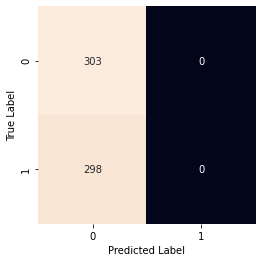

In [37]:
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test,y_pred)

ax = plt.axes()
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()